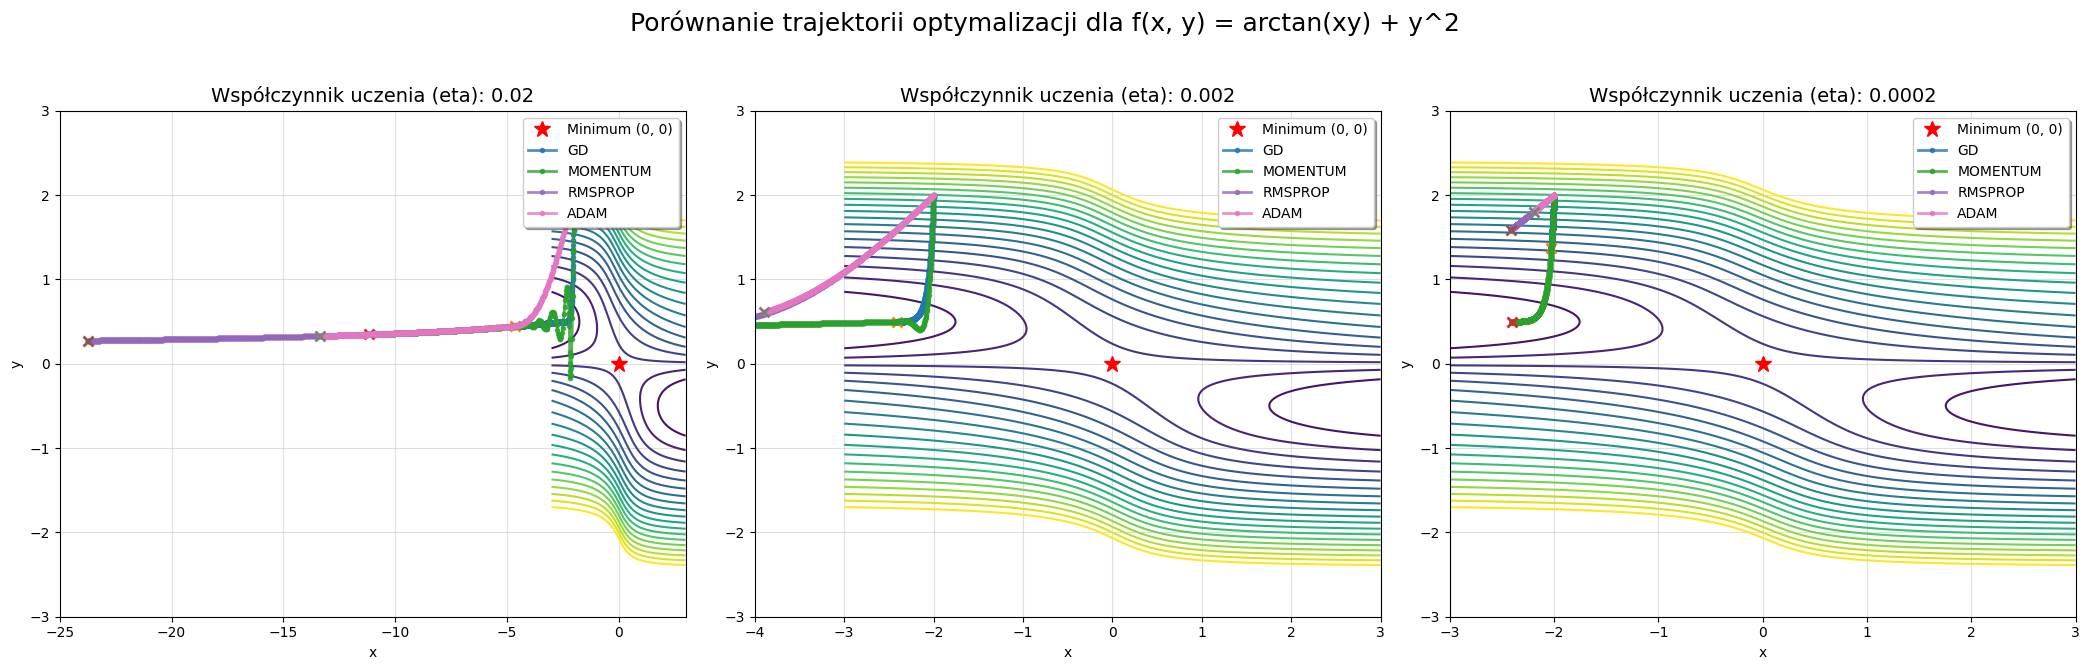


--- 4.1 Regresja Liniowa z GD ---
Początkowe współczynniki (theta):
 [0.01300189 1.45353408]
------------------------------
Końcowe współczynniki regresji (theta):
 [4.21509616 2.77011339]
Oczekiwane wartości (b=4, a=3):
 [4.        3.       ]

--- 6. Wprowadzenie do TensorBoard ---
Uruchomienie TensorBoard: Po zakończeniu treningu uruchom w terminalu:

    tensorboard --logdir=logs\fit

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9255 - loss: 0.2630 - val_accuracy: 0.9577 - val_loss: 0.1409
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9657 - loss: 0.1168 - val_accuracy: 0.9659 - val_loss: 0.1103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9759 - loss: 0.0810 - val_accuracy: 0.9737 - val_loss: 0.0851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0599 - val_accuracy: 0.9749 - val_loss: 0.0796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9852 - loss: 0.0469 - v

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import os 
import datetime
import warnings
from tensorflow.keras import layers, models 

# ----------------------------------------------------------------------
# 1. Definicja funkcji celu i jej gradientu
# ----------------------------------------------------------------------

def custom_function(x, y):
    """Funkcja celu: f(x, y) = arctan(xy) + y^2."""
    return np.arctan(x * y) + y**2

def custom_function_grad(x, y):
    """Gradient funkcji celu: [df/dx, df/dy]"""
    denominator = 1 + (x * y)**2
    df_dx = y / denominator
    df_dy = x / denominator + 2 * y
    return np.array([df_dx, df_dy])

# ----------------------------------------------------------------------
# 2. Implementacja Optymalizatorów
# ----------------------------------------------------------------------

def optimize_path(opt_name, lr, steps=1000, initial_pos=np.array([-2.0, 2.0])):
    """Śledzi ścieżkę optymalizacji."""
    pos = initial_pos.copy()
    path = [pos.copy()]
    v, s = np.zeros(2), np.zeros(2) 
    beta1, beta2 = 0.9, 0.999
    eps = 1e-8
    
    for t in range(1, steps + 1):
        grad = custom_function_grad(*pos)
        
        if opt_name == 'gd':
            pos -= lr * grad
        elif opt_name == 'momentum':
            v = beta1 * v + lr * grad
            pos -= v
        elif opt_name == 'rmsprop':
            s = beta2 * s + (1 - beta2) * grad**2
            pos -= lr / (np.sqrt(s) + eps) * grad
        elif opt_name == 'adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            pos -= lr * v_corr / (np.sqrt(s_corr) + eps)
            
        path.append(pos.copy())
        
    return np.array(path)

# ----------------------------------------------------------------------
# 3. WIZUALIZACJA I PORÓWNANIE WYNIKÓW (WERSJA CICHA)
# ----------------------------------------------------------------------

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

learning_rates = [0.02, 0.002, 0.0002]
optimizers = ['gd', 'momentum', 'rmsprop', 'adam']

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = custom_function(X, Y)

min_Z = np.min(Z[np.isfinite(Z)])
max_Z_clip = min_Z + 5 

fig, axes = plt.subplots(1, len(learning_rates), figsize=(21, 7)) 
plt.suptitle(f"Porównanie trajektorii optymalizacji dla f(x, y) = arctan(xy) + y^2", fontsize=18)

xlim_list = [[-25, 3], [-4, 3], [-3, 3]]
ylim_list = [[-3, 3], [-3, 3], [-3, 3]]


for i, lr in enumerate(learning_rates):
    ax = axes[i]
    
    min_log_val = np.log10(min_Z + 1e-4)
    max_log_val = np.log10(max_Z_clip)
    levels = np.logspace(min_log_val, max_log_val, 20)
    
    try:
        ax.contour(X, Y, Z, levels=levels, cmap='viridis', norm=colors.LogNorm(vmin=min(levels), vmax=max(levels)))
    except ValueError:
        levels_linear = np.linspace(min_Z, max_Z_clip, 20)
        ax.contour(X, Y, Z, levels=levels_linear, cmap='viridis')

    
    ax.set_xlim(xlim_list[i])
    ax.set_ylim(ylim_list[i])
        
    ax.plot(0, 0, 'r*', markersize=12, label='Minimum (0, 0)', zorder=5)
    
    for opt in optimizers:
        path = optimize_path(opt, lr=lr, steps=1000)
        ax.plot(path[:, 0], path[:, 1], 'o-', markersize=3, alpha=0.8, label=opt.upper(), lw=2)
        ax.plot(path[-1, 0], path[-1, 1], 'x', markersize=7, markeredgewidth=2) 
        
    ax.set_title(f"Współczynnik uczenia (eta): {lr}", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc='upper right', fancybox=True, shadow=True)
    ax.grid(True, alpha=0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

warnings.filterwarnings("default", category=RuntimeWarning)
warnings.filterwarnings("default", category=UserWarning)

# ----------------------------------------------------------------------
# 4.1 Regresja liniowa przy użyciu GD
# ----------------------------------------------------------------------

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.randn(2, 1)

eta = 0.1 
n_iterations = 1000
m = 100 

print("\n--- 4.1 Regresja Liniowa z GD ---")
print("Początkowe współczynniki (theta):\n", theta.flatten())
print("-" * 30)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print("Końcowe współczynniki regresji (theta):\n", theta.flatten())
print("Oczekiwane wartości (b=4, a=3):\n [4.        3.       ]")

# ----------------------------------------------------------------------
# 6. Wprowadzenie do TensorBoard
# ----------------------------------------------------------------------

# Przygotowanie danych (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0  
x_test = x_test.reshape(-1, 28 * 28) / 255.0

# 2. Definicja modelu MLP
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Konfiguracja TensorBoard
log_dir = os.path.join("logs", "fit", "wariant_10_mlp_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=0
)

print("\n--- 6. Wprowadzenie do TensorBoard ---")
print(f"Uruchomienie TensorBoard: Po zakończeniu treningu uruchom w terminalu:\n\n    tensorboard --logdir={os.path.join('logs', 'fit')}\n")

# Trening modelu z zapisem do TensorBoard
history = model.fit(
    x_train, 
    y_train, 
    epochs=5, 
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)